In [9]:
print("Sales Data Analysis Project")


Sales Data Analysis Project


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
a=pd.read_csv("Coffe_sales.csv")
a.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [13]:
a.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [14]:
a.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [15]:
a.duplicated().sum()

np.int64(0)

In [16]:
a=a.drop_duplicates()

In [17]:
a.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [18]:
a.columns=a.columns.str.strip().str.lower().str.replace(" ","_")
a.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'time_of_day',
       'weekday', 'month_name', 'weekdaysort', 'monthsort', 'date', 'time'],
      dtype='object')

In [19]:
a['date'] = pd.to_datetime(a['date'])


In [20]:
a['month'] = a['date'].dt.month
a['year'] = a['date'].dt.year


In [21]:
a.head()

,hour_of_day,cash_type,money,coffee_name,time_of_day,weekday,month_name,weekdaysort,monthsort,date,time,month,year
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,3,2024
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,3,2024
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,3,2024
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,3,2024
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,3,2024


In [22]:
total_revenue = a['money'].sum()
total_revenue

np.float64(112245.57999999999)

In [23]:
coffee_sales = a.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
coffee_sales

coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64

In [24]:
a.columns.tolist()


['hour_of_day',
 'cash_type',
 'money',
 'coffee_name',
 'time_of_day',
 'weekday',
 'month_name',
 'weekdaysort',
 'monthsort',
 'date',
 'time',
 'month',
 'year']

In [25]:
time_sales = a.groupby('time_of_day')['money'].sum()
time_sales


time_of_day
Afternoon    38130.04
Morning      35929.20
Night        38186.34
Name: money, dtype: float64

In [26]:
a.columns = a.columns.str.strip().str.lower()
a.columns


Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'time_of_day',
       'weekday', 'month_name', 'weekdaysort', 'monthsort', 'date', 'time',
       'month', 'year'],
      dtype='object')

<Axes: title={'center': 'Sales by Time of Day'}, xlabel='time_of_day'>

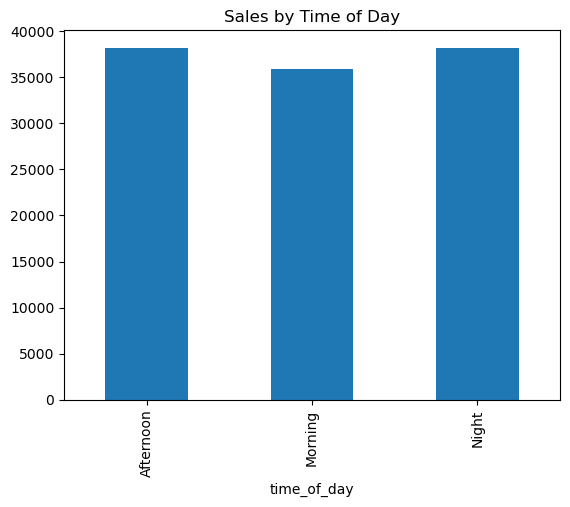

In [27]:
time_sales.plot(kind='bar', title='Sales by Time of Day')


In [28]:
coffee_sales = a.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
coffee_sales


coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64

<Axes: title={'center': 'Top 5 Coffees by Revenue'}, xlabel='coffee_name'>

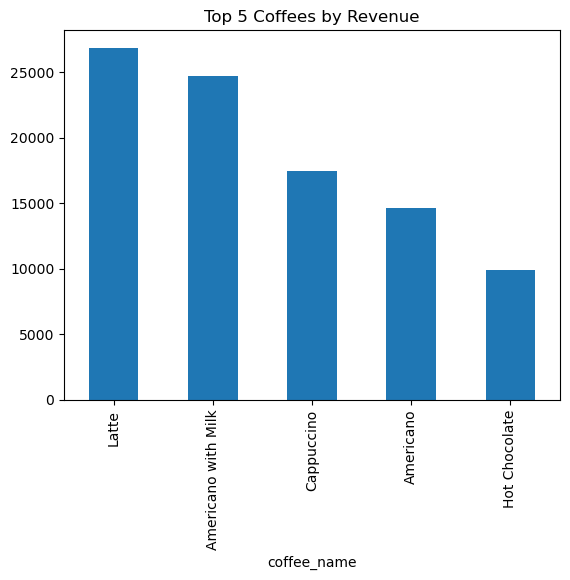

In [29]:
coffee_sales.head(5).plot(kind='bar', title='Top 5 Coffees by Revenue')


In [30]:
monthly_sales = a.groupby('month')['money'].sum()
monthly_sales


month
1      6398.86
2     13215.48
3     15891.64
4      5719.56
5      8164.42
6      7617.76
7      6915.94
8      7613.84
9      9988.64
10    13891.16
11     8590.54
12     8237.74
Name: money, dtype: float64

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='month'>

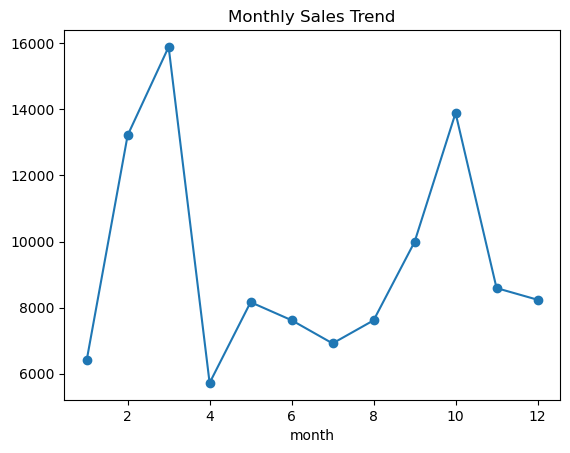

In [31]:
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
